In [1]:
!gcloud config set project etsy-bigquery-adhoc-prod


If you have a compatible Python interpreter installed, you can use it by setting
the CLOUDSDK_PYTHON environment variable to point to it.

Updated property [core/project].


In [2]:
%load_ext google.cloud.bigquery

In [7]:
%%bigquery df
with fb as (
  select key, queryTaxoDemandFeatures_impressionCount, queryTaxoDemandFeatures_purchaseCount,
  queryTaxoDemandFeatures_purchaseCount / queryTaxoDemandFeatures_impressionCount as query_conversion
  from `etsy-ml-systems-prod.feature_bank_v2.query_feature_bank_most_recent`
)
select * from fb
join `etsy-search-ml-dev.gdonovan.per_query_conversion_rate` p
on fb.key = p.query
where query_conversion > 0 and query_conversion < 1

Downloading: 100%|██████████████| 3856702/3856702 [00:09<00:00, 419343.72rows/s]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.shape

(3856702, 8)

In [9]:
df.head()

,key,queryTaxoDemandFeatures_impressionCount,queryTaxoDemandFeatures_purchaseCount,query_conversion,query,total_purchase_count,total_event_count,conversion_rate
0,we made a family,4990,18,0.003607,we made a family,161,21118,0.007624
1,mom life svg,81169,115,0.001417,mom life svg,971,190265,0.005103
2,peyote bracelet pattern,15196,8,0.000526,peyote bracelet pattern,126,48065,0.002621
3,homecookedkarma,881,1,0.001135,homecookedkarma,53,8386,0.006320
4,decorative license plate,7212,2,0.000277,decorative license plate,45,24107,0.001867


<Axes: xlabel='query_conversion', ylabel='conversion_rate'>

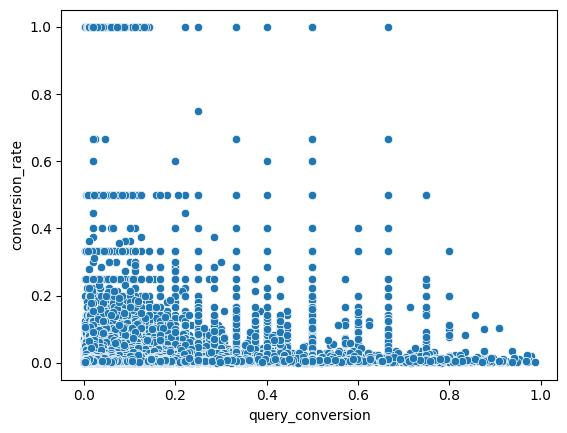

In [10]:
sns.scatterplot(data=df, x="query_conversion", y="conversion_rate")

In [13]:
df[["query_conversion", "conversion_rate"]].corr()

,query_conversion,conversion_rate
query_conversion,1.000000,0.497518
conversion_rate,0.497518,1.000000
